# Unsupervised Learning: Hierarchical clustering 

**Unsupervised learning** gaat om het vinden van patronen in datasets waar vooraf géén gelabelde data of een bekende uitkomst wordt gebruikt bij het opstellen van een algorithme.

Een **cluster** verwijst naar een verzameling gegevenspunten die vanwege bepaalde overeenkomsten zijn samengevoegd.

In dit notebook vind je voorbeelden en opdrachten over de **hierarchical clustering** techniek.

## Hierarchical clustering en dendrogram

**Hierarchical clustering** is een algemene familie van clusteringalgoritmen die geneste clusters bouwen door ze achtereenvolgens samen te voegen of te splitsen. 

Deze hiërarchie van clusters wordt weergegeven als een boom (*dendrogram*, *dendro* is Latijn voor 'boom'). De wortel van de boom is de unieke cluster die alle monsters verzamelt, waarbij de bladeren de clusters zijn met slechts één monster.

Wanneer het hiërarchische clusteralgoritme (HCA) de gegevenspunten begint te koppelen en clusters begint te vinden, kan het eerst de gegevenspunten in 2 grote groepen splitsen en vervolgens elk van die twee groepen in kleinere 2 groepen splitsen, met in totaal 4 groepen. Dit is de `divisive` methode, een top-down benadering.

Een alternatief is het tegenovergestelde doen - het begint naar alle gegevenspunten te kijken, dan twee gegevenspunten vinden die het dichtst bij elkaar liggen, deze koppelen en dan andere gegevenspunten vinden die het dichtst bij die gekoppelde punten liggen en de twee groepen blijven bouwen van onder naar boven. Dat is de `agglomeratieve` methode, een bottom-up benadering.

In deze module bekijken we de`agglomeratieve` methode.


![Hierarchical dendrogram](./images/Hierarchical_Clus_den.png)

Om de agglomeratiebenadering nog duidelijker te maken, zijn de stappen van het `Agglomerative Hierarchical Clustering` (AHC) algoritme, als volgt:
* Stap 1: maak van elk datapunt een single-point cluster. Dat vormt N clusters.
>Daarom is het aantal clusters aan het begin N - waarbij N een geheel getal is dat het aantal gegevenspunten vertegenwoordigt.
* Stap 2: neem de twee dichtstbijzijnde datapunten en maak er één cluster van. Dat vormt N-1 clusters.
* Stap 3: neem de twee dichtstbijzijnde clusters en maak er één cluster van. Dat vormt N-2 clusters.
* Stap 4: herhaal Stap 3 totdat er nog maar één cluster is.

Bekijk vooral ook het volgende videogedeelte van Serrano.Academy, waarin de stappen van de hierarchische clustering en de opbouw van een dendrogram visueel duidelijk zijn uitgelegd: [Hierarchy Clustering](https://youtu.be/QXOkPvFM6NU?t=693).

### Bronnen
* Unsupervised learning video: [Unsupervised Learning - Georgia Tech - Machine Learning](https://www.youtube.com/embed/1qtfILYSDJY)
* Serrano.Academy video: [Clustering: K-means and Hierarchical](https://youtu.be/QXOkPvFM6NU)
* Scikit-learn documentatie: [clustering](https://scikit-learn.org/stable/modules/clustering.html?highlight=clustering)
* https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
* Towards Data Science: [Understanding the concept of Hierarchical clustering Technique](https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec), Chaitanya Reddy Patlolla, 2018


In [1]:
# convenience functions and configuration
%matplotlib inline

import sys
import os
from pathlib import Path
from packaging import version
import sklearn
import matplotlib.pyplot as plt
import pandas as pd

# Check Python and library versions
assert sys.version_info >= (3, 7)
# check scikit-learn version
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")


# helper functions to load Excel files.
# Excel CSV-file
def load_csv_pd_data(path, filename, 
                     names=None, 
                     delim_whitespace=False
                    ):
    '''
    load_csv_pd_data() - construct a pandas DataFrame object 
           from data in a Excel CSV file `filename`,
           stored in a folder `path`.
           @names: header-names of columns
    @returns: a pandas DataFrame
    '''
    csv_path = os.path.join(path, filename)
    # DEBUG: print(csv_path)
    return pd.read_csv(csv_path,
                       delim_whitespace=delim_whitespace,
                       names=names,
                      )

# Excel XLS-file
def load_xls_pd_data(path, filename, 
                     names=None
                    ):
    '''
    load_xls_pd_data() - construct a pandas DataFrame object 
           from data in a Excel xls-file `filename`,
           stored in a folder `path`.
    @returns: a pandas DataFrame
    '''
    xls_path = os.path.join(path, filename)
    # DEBUG: print(xls_path)
    return pd.read_excel(xls_path,
                         names=names
                        )


# Increase font size for plots
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


# Create the `images/training_linear_models` folder
IMAGES_PATH = Path() / "images" / "clustering"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
# helper function to plot a dendrogram of a model

import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# helper function toplot a dendrogram of model
# model: Dit is een getraind model, meestal van het type AgglomerativeClustering uit scikit-learn. 
# Het model moet zijn getraind met compute_distances=True, anders is de benodigde model.distances_ niet beschikbaar.
# kwargs: Extra argumenten voor de dendrogram functie, zoals:
#   labels: Specifieke labels voor de datapunten.
#   leaf_rotation: Hoek van de tekstlabels.
#   leaf_font_size: Grootte van de tekstlabels.

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

---
## Voorbeeld Agglomerative hierarchical clustering

scikit-learn biedt de `AgglomerativeClustering`klasse om de agglomeratieve clusteringmethode te implementeren. We beginnen met het laden van de vereiste modules in Python:

In [3]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

#### Preparing the data

In dit voorbeeld maken we een voorbeeldgegevensset om clustering toe te passen. We gebruiken de functie `make_blobs` om gegevens te genereren en deze in een plot te visualiseren.

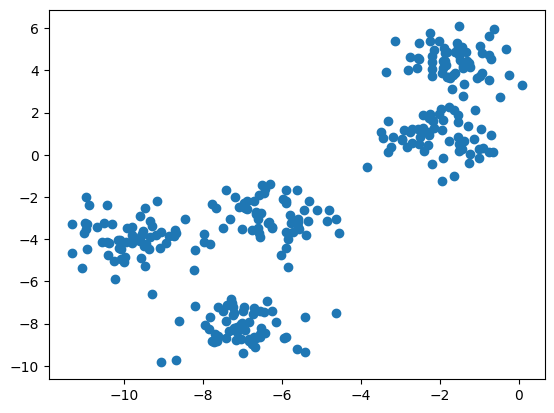

In [4]:
np.random.seed(1)
X, _ = make_blobs(n_samples=300, centers=5, cluster_std=.8)
plt.scatter(X[:,0], X[:,1])
plt.show()

#### Clusteren met de AgglomerativeClustering

Vervolgens definiëren we het model en passen het op de x-gegevens. 
 
De `AgglomerativeClustering`klasse heeft verschillende parameters om in te stellen - zie de help informatie! 
- De koppelingsparameter (`linkage`) definieert de samenvoegingscriteria die de afstandsmethode tussen de sets van de waarnemingsgegevens vormen.Ofwel, de ongelijkheid tussen twee cluster van waarnemingen. De methoden *ward*, *complete*, *average* en *single* kunnen worden gebruikt. De default is *ward*. Zie de (theorie)slides bij *cluster similarity*, of, bestudeer de helpinformatie van `AgglomerativeClustering`.
- De `affinity`parameter definieert de afstandsmetriek om de koppeling (`linkage`) te berekenen. De metrieken "euclidian" en "manhatten" kunnen worden gebruikt. Zie de (theorie)slides bij *cluster similarity*, of, bestudeer de helpinformatie van `AgglomerativeClustering`. 
>Echter als de `linkage` waarde "ward" is, dan moet `affinity` de waarde "euclidean" hebben (zie help informatie). 
- Het aantal clusters kan worden ingesteld met de parameter `n_clusters`. 

Hier stellen we het `n_clusters`nummer in en houden we de andere parameters als standaard.

AgglomerativeClustering(n_clusters=5)


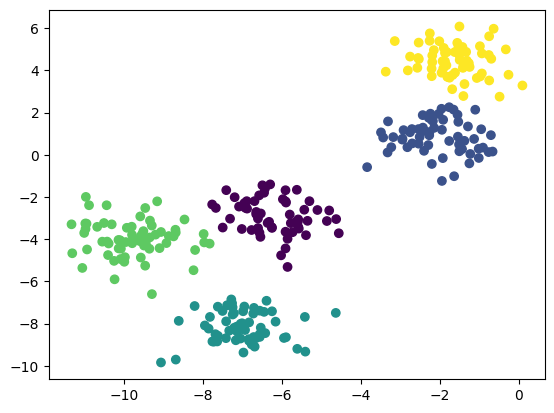

In [5]:
# we'll set n_clusters number and keep 
# the other parameters as default.

aggloclust=AgglomerativeClustering(
    n_clusters=5
).fit(X)
print(aggloclust)

# We'll get the clustered labels
labels = aggloclust.labels_

# Finally, we'll visualize the clustered points 
# by separating them with different colors.
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()

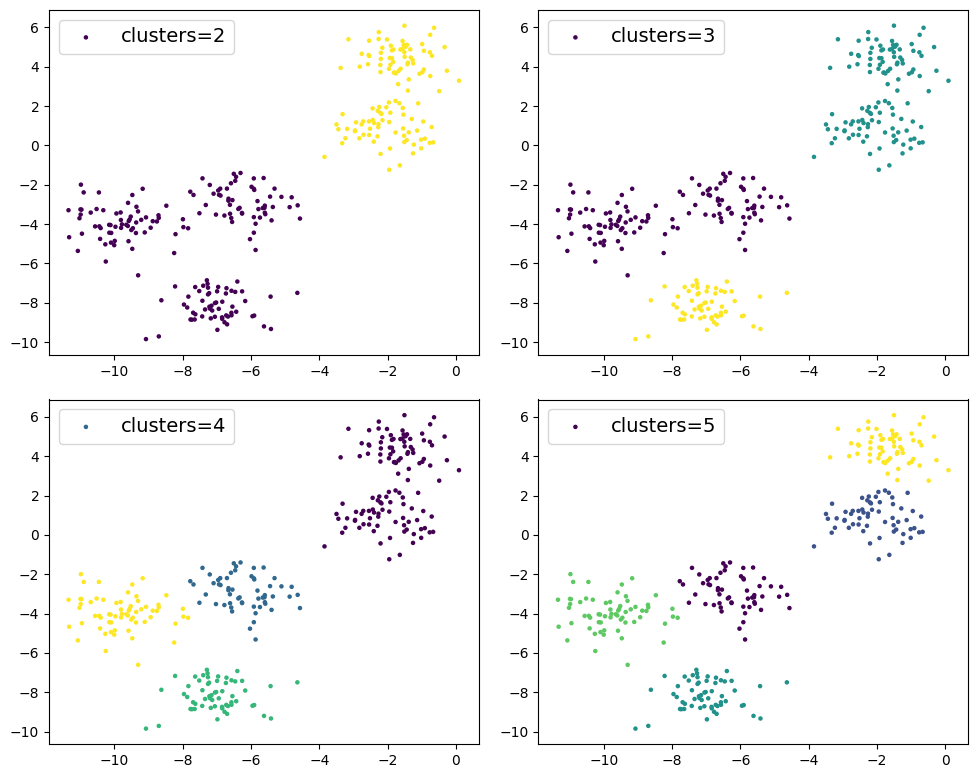

In [6]:
# We can also check the clustering results 
# by changing the number of clusters.
f = plt.figure(figsize=(10,8))  # size of the plot
for i in range(2, 6):
    hac=AgglomerativeClustering(n_clusters=i).fit(X)
    f.add_subplot(2, 2, i-1)
    plt.scatter(X[:,0], X[:,1], s=5, 
                c=hac.labels_, label="clusters="+str(i))
    plt.legend(loc='upper left')

save_fig("AgglomerativeClustering_clusters")
plt.show()

#### Voorbeeld Dendrogram

Een **dendrogram** van de dataset (`make_blobs`) gaat als volgt:

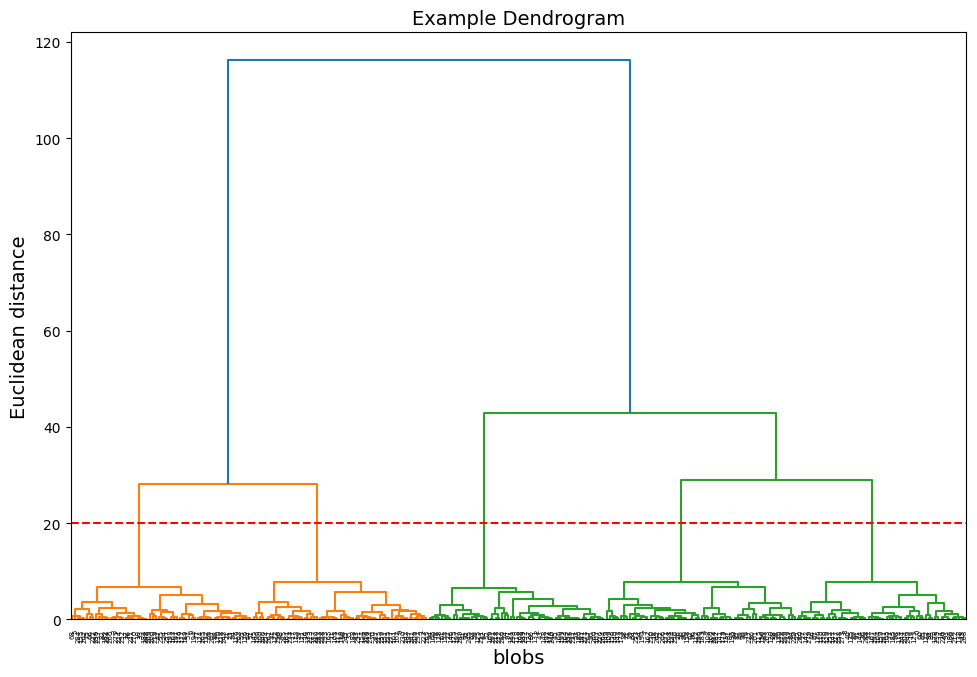

In [7]:
import scipy.cluster.hierarchy as shc

# Hiermee wordt een figuur van 10×710×7 inch gecreëerd waarin het dendrogram wordt getekend.
plt.figure(figsize=(10, 7))

# make clusters based upon linkage-method and metric
# X: De inputdataset, meestal een matrix van datapunten.
# method='ward': Gebruikt de Ward-methode, die clusters samenvoegt om de toename in binnen-cluster variantie minimaal te houden.
# metric='euclidean': De Euclidische afstand wordt gebruikt om de afstand tussen datapunten of clusters te berekenen.
clusters = shc.linkage(X, 
            method='ward', 
            metric="euclidean")

# Deze methode retourneert een linkage-matrix met informatie over het samenvoegen van clusters:
# De indices van de twee clusters die worden samengevoegd.
# De afstand tussen die clusters.
# Het aantal punten in het nieuwe cluster.

# print(clusters)

# plot het dendrogram
# Z=clusters: De linkage-matrix wordt doorgegeven aan de dendrogram functie.
# Het dendrogram laat zien hoe en wanneer clusters worden samengevoegd, met de afstand weergegeven op de yy-as
shc.dendrogram(Z=clusters)

# Het dendrogram toont hoe de clusters hiërarchisch zijn gevormd. Elk blad (onderaan) vertegenwoordigt een datapunt.
# De hoogte van een verbinding in het dendrogram geeft aan hoe ver clusters uit elkaar liggen voordat ze worden samengevoegd.

# Door de horizontale lijn (y=20) te plaatsen, kun je het aantal clusters bepalen door te tellen hoeveel verticale lijnen de horizontale lijn doorsnijdt.
plt.axhline(y=20, color='r', linestyle='--')

# plot title, labels etc.
plt.title("Example Dendrogram")
plt.xlabel("blobs")
plt.ylabel("Euclidean distance")
# optional: 
save_fig("dendrogram_blobs")
plt.show()

De keuze voor y=20 in het dendrogram is subjectief en hangt af van hoe je de clustering wilt interpreteren. 

Het is vaak het resultaat van een visuele inspectie van het dendrogram, waar het doel is om clusters met voldoende interne samenhang en externe scheiding te vinden.

Het bepaalt de "cut-off" hoogte in het dendrogram en beïnvloedt het aantal clusters dat je identificeert.

In dit geval, bij y=20, zie je dat er 5 clusters zijn. 

# Dendrogram en het aantal clusters

Zie het volgende voorbeeld

![DBSCAN_clustering](./images/example_dendrogram.png)

De optimale y-waarde voor deze specifieke dataset is y≈120.88 (zie de rode horizontale lijn).

Op dit punt vindt de **grootste sprong** in de fusie-afstanden plaats = de grootste toename in de fusie-afstanden tussen opeenvolgende clustering-stappen in het dendrogram. 

Fijn maar wat zijn fusie-afstanden?

Fusie-afstanden (de y-as in het dendrogram) geven aan hoe "ver" (of hoe verschillend) de clusters waren voordat ze werden samengevoegd. Naarmate clusters worden samengevoegd, neemt deze afstand meestal geleidelijk toe. 

**Maar** op een bepaald punt kan er een grote sprong plaatsvinden, wat aangeeft dat de samengevoegde clusters eigenlijk minder sterk verwant zijn.

Ok waarom is dat belangrijk?

Welnu, als de fusie-afstand ineens veel groter wordt, betekent dit dat de samengevoegde clusters steeds minder homogeen worden. Dit is vaak een goed moment om te stoppen met clusteren. De grootste sprong vertegenwoordigt dus de overgang van goed gescheiden clusters naar minder samenhangende clusters.

In het voorbeeld hierboven zat je nog op 3 clusters en toen ging je opeens naar 2 clusters (de grote sprong).

Het ideaal aantal clusters zal dus waarschijnlijk 3 zijn.

Opmerking: het *dendrogram* moet alleen als referentie worden beschouwd wanneer het wordt gebruikt om het aantal clusters te kiezen. 

Het aantal clusters kan gemakkelijk veranderen en wordt volledig beïnvloed door het type koppeling (`linkage`) en afstandsstatistieken (`distance metrics`). 

Bij het uitvoeren van een diepgaande clusteranalyse is het raadzaam om te kijken naar dendrogrammen met **verschillende koppelingen en metrieken** en om te kijken naar de resultaten die worden gegenereerd waarin de clusters de meeste afstand tussen de clusters hebben.

---
## Voorbeeld dendrogram iris dataset


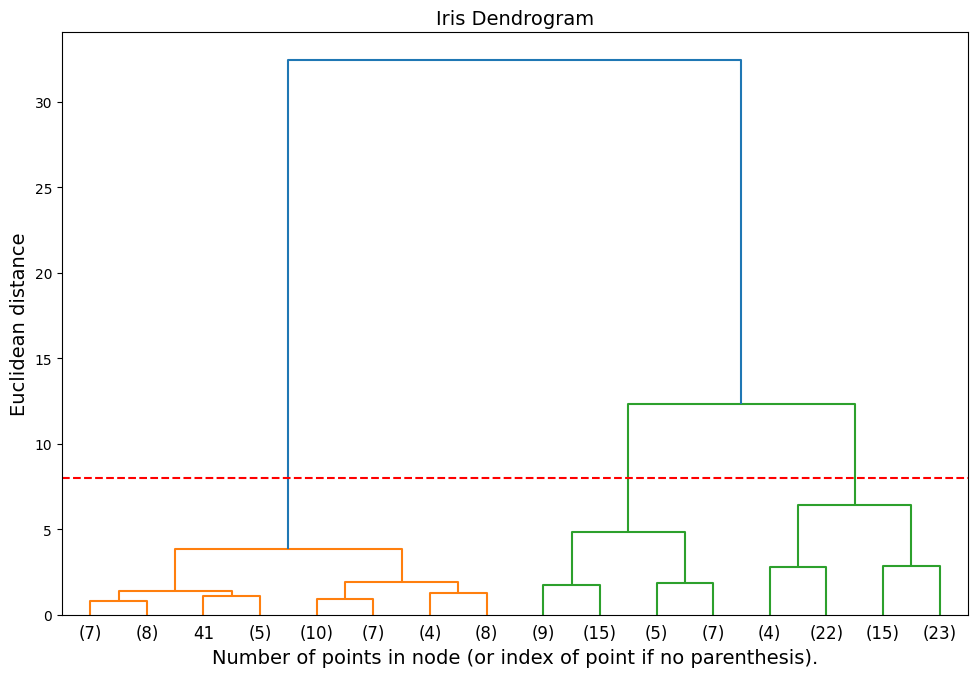

In [8]:
# dendrogram of hierarchical clustering of iris dataset

from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# load iris dataset from scikit-learn datasets
iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures 
# we compute the full tree.
# Note: we do NOT supply number of clusters!
model = AgglomerativeClustering(
    distance_threshold=0, 
    n_clusters=None
)

# train the model
model = model.fit(X)

# plot dendogram
plt.figure(figsize=(10, 7))  # size of the plot

# plot the top three levels of the dendrogram
plot_dendrogram(model, 
                truncate_mode="level", 
                p=3
               )

# draw horizontal line to the longest line that traverses 
# maximum distance up and down without intersecting 
# the merging point -> number of optimal clusters
plt.axhline(y=8, color='r', linestyle='--')

# plot title, labels etc.
plt.title("Iris Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Euclidean distance")
# optional
save_fig("dendrogram_iris")
plt.show()

Om het aantal clusters te kiezen, trekken we een horizontale lijn naar de langste lijn die de maximale afstand op en neer doorloopt zonder de samenvoegingspunten te snijden (artikel: [What is Hierarchical Clustering?](https://www.kdnuggets.com/2019/09/hierarchical-clustering.html) - Cutting Line).

We tekenen dus een horizontale lijn en het aantal verticale lijnen dat het snijdt is het optimale aantal clusters.

Zie horizontal stippellijn in bovenstaande dendrogram. In dit geval tellen we 3 vertikale lijnen die door de horizontale lijn worden doorsneden. En dat is dan het aantal clusters dat we doorgeven aan een hierarchical clusteringsmodel.

#### Bron
- artikel [What is Hierarchical Clustering?](https://www.kdnuggets.com/2019/09/hierarchical-clustering.html). Artkel is interessant omdat met animaties uitgelegd wordt wat  `Agglomerative Hierarchical Clustering` is en de opbouw van een dendrogram. 

---
## Opdracht - shopping data hierarchical clustering

Dataset: `shopping-data.csv` in folder `data`.

Stel je een scenario voor waarin je deel uitmaakt van een data science-team dat samenwerkt met de marketingafdeling. Marketing verzamelt al een tijdje winkelgegevens van klanten en ze willen op basis van de verzamelde gegevens begrijpen of er overeenkomsten zijn tussen klanten. Die overeenkomsten verdelen klanten in groepen en het hebben van klantgroepen helpt bij doelstellingen van campagnes, promoties, conversies en het opbouwen van betere klantrelaties.

Een manier om die vraag te beantwoorden is door een clusteringalgoritme te gebruiken, zoals K-Means of Hiërarchische Clustering. In algemene termen vinden clusteringalgoritmen overeenkomsten tussen gegevenspunten en groeperen ze.

In de scatterplots van onderstaande figuur *Shopping data* is te zien dat er groepen gegevens lijken te zijn. 

1. Wat zijn de *features* die interessant lijken, omdat in de scatterplot er groepen gegevens lijken te zijn. 
2. Bepaal de optimale aantal clusters via een dendrogram.
3. Bepaal de clustering d.m.v. `AgglomerativeClustering` uit scikit-learn.

![Shopping data](./images/opdracht_customer_data_pairplot.jpg)

### Bronnen

- artikel [Definitive Guide to Hierarchical Clustering with Python and Scikit-Learn](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/). Artkel is ook interessant omdat aan *feature selection* analyse gedaan wordt en er een 2de clusteringtechniek wordt toegepast. Aanbevelingswaardig artikel (op enkele slordigheden in de code na).

- artikel [What is Hierarchical Clustering?](https://www.kdnuggets.com/2019/09/hierarchical-clustering.html). Artkel is interessant omdat met animaties uitgelegd wordt wat  `Agglomerative Hierarchical Clustering` is en de opbouw van een dendrogram. 

In [9]:
# hier komt jouw code...



Uit de oplossing zie je de kleurgecodeerde gegevenspunten in de vorm van vijf clusters. Nu kan gekeken worden hoe de diverse clusters van klanten benaderd kunnen worden.

![customer clusters](./images/Clusters_of_Customers.png)

1. Datapunten rechtsonder (label: 0, paarse datapunten) behoren tot de klanten met hoge salarissen maar lage bestedingen. Dit zijn de klanten die hun geld zorgvuldig besteden.
2. Evenzo zijn de klanten rechtsboven (label: 2, groene datapunten), de klanten met hoge salarissen en hoge uitgaven. Dit zijn het soort klanten waarop bedrijven zich richten.
3. De klanten in het midden (label: 1, blauwe datapunten) zijn degenen met een gemiddeld inkomen en gemiddelde bestedingen. De hoogste aantallen klanten behoren tot deze categorie. Bedrijven kunnen zich ook op deze klanten richten, gezien het feit dat ze in grote aantallen zijn.
4. De klanten linksonder (label: 4, rood) zijn de klanten met een laag salaris en lage uitgaven, ze kunnen worden aangetrokken door het aanbieden van promoties.
5. En tot slot, de klanten in de linkerbovenhoek (label: 3, oranje datapunten) zijn degenen met een laag inkomen en hoge uitgaven, die idealiter gericht worden benaderd door marketing, maar ook dat er groter risico op schulden is.

NB. De kleuren zijn afhankelijk wat je gedefinieerd hebt.

---

## Conclusie

Hiërarchische clustering is een zeer bruikbare manier van segmentatie. Het voordeel dat het aantal clusters niet **vooraf** hoeft te worden gedefinieerd, geeft het een behoorlijk voordeel ten opzichte van k-Means. De techniek werkt echter niet goed als we een enorme hoeveelheid gegevens hebben.

---